In [69]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
from modules import Linear, TanH, Sigmoid, Sequential, BCELoss
from optim.sgd import SGD
from optim.optimizer import Optimizer
from utils.plot import plot_loss

# Parameters
batch_size = 256
num_iterations = 1000
learning_rate = 0.02

# Load USPS dataset
data = pkl.load(open("data/usps.pkl", "rb"))
X_train = np.array(data["X_train"], dtype=float)
X_test = np.array(data["X_test"], dtype=float)
y_train = np.array(data["Y_train"], dtype=int)
y_test = np.array(data["Y_test"], dtype=int)


encoder3 = Sequential(
    Linear(256, 100),
    TanH(),
    Linear(100, 3),
    TanH(),
)

hidden_weights = encoder3._modules["0"]._parameters["weight"]
latent_weights = encoder3._modules["2"]._parameters["weight"]

decoder3 = Sequential(
    Linear(3, 100),
    TanH(),
    Linear(100, 256),
    Sigmoid(),
)

decoder3._modules["0"]._parameters["weight"] = latent_weights.T
decoder3._modules["2"]._parameters["weight"] = hidden_weights.T

autoencoder = Sequential(encoder3, decoder3)

bce_loss = BCELoss()

optimizer = Optimizer(autoencoder, bce_loss, learning_rate)

loss_list = SGD(
    X_train, X_train, batch_size, num_iterations, optimizer, iterations_per_epoch=100
)


Epoch 10: 100%|██████████| 100/100 [00:33<00:00,  3.00it/s, Loss=0.361]


In [70]:


encoder5 = Sequential(
    Linear(256, 100),
    TanH(),
    Linear(100, 5),
    TanH(),
)

hidden_weights = encoder5._modules["0"]._parameters["weight"]
latent_weights = encoder5._modules["2"]._parameters["weight"]

decoder5 = Sequential(
    Linear(5, 100),
    TanH(),
    Linear(100, 256),
    Sigmoid(),
)

decoder5._modules["0"]._parameters["weight"] = latent_weights.T
decoder5._modules["2"]._parameters["weight"] = hidden_weights.T

autoencoder = Sequential(encoder5, decoder5)

bce_loss = BCELoss()

optimizer = Optimizer(autoencoder, bce_loss, learning_rate)

loss_list = SGD(
    X_train, X_train, batch_size, num_iterations, optimizer, iterations_per_epoch=100
)


Epoch 10: 100%|██████████| 100/100 [00:34<00:00,  2.94it/s, Loss=0.308]


In [73]:


encoder2 = Sequential(
    Linear(256, 100),
    TanH(),
    Linear(100, 2),
    TanH(),
)

hidden_weights = encoder2._modules["0"]._parameters["weight"]
latent_weights = encoder2._modules["2"]._parameters["weight"]

decoder2 = Sequential(
    Linear(2, 100),
    TanH(),
    Linear(100, 256),
    Sigmoid(),
)

decoder2._modules["0"]._parameters["weight"] = latent_weights.T
decoder2._modules["2"]._parameters["weight"] = hidden_weights.T

autoencoder = Sequential(encoder2, decoder2)

bce_loss = BCELoss()

optimizer = Optimizer(autoencoder, bce_loss, learning_rate)

loss_list = SGD(
    X_train, X_train, batch_size, num_iterations, optimizer, iterations_per_epoch=100
)


Epoch 10: 100%|██████████| 100/100 [00:32<00:00,  3.12it/s, Loss=0.396]


In [74]:


encoder10 = Sequential(
    Linear(256, 100),
    TanH(),
    Linear(100, 10),
    TanH(),
)

hidden_weights = encoder10._modules["0"]._parameters["weight"]
latent_weights = encoder10._modules["2"]._parameters["weight"]

decoder10 = Sequential(
    Linear(10, 100),
    TanH(),
    Linear(100, 256),
    Sigmoid(),
)

decoder10._modules["0"]._parameters["weight"] = latent_weights.T
decoder10._modules["2"]._parameters["weight"] = hidden_weights.T

autoencoder = Sequential(encoder10, decoder10)

bce_loss = BCELoss()

optimizer = Optimizer(autoencoder, bce_loss, learning_rate)

loss_list = SGD(
    X_train, X_train, batch_size, num_iterations, optimizer, iterations_per_epoch=100
)


Epoch 10: 100%|██████████| 100/100 [00:28<00:00,  3.47it/s, Loss=0.257]


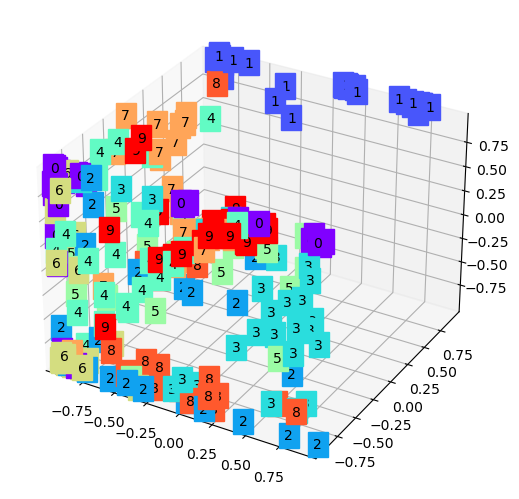

In [76]:
# Plot loss

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# plot_loss(
#     loss_list, batch_size, None, num_iterations, learning_rate, "autoencoder_3d.png"
# )

# Plot latent space 3d
encoder3.eval()
latent = encoder3.forward(X_test[:256])
fig = plt.figure()
ax = Axes3D(fig)    # 3D 图
# x, y, z 的数据值
X = latent[:, 0]
Y = latent[:, 1]
Z = latent[:, 2]

values = y_test[:256]  # 标签值

for x, y, z, s in zip(X, Y, Z, values):
    c = cm.rainbow(int(255*s/9))    # 上色
    ax.text(x, y, z, s , backgroundcolor=c)  # 标位子
ax.scatter(X, Y, Z, c=values, cmap='rainbow')
ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_zlim(Z.min(), Z.max())
fig.add_axes(ax)
plt.savefig("autoencoder_3d_latent.png")

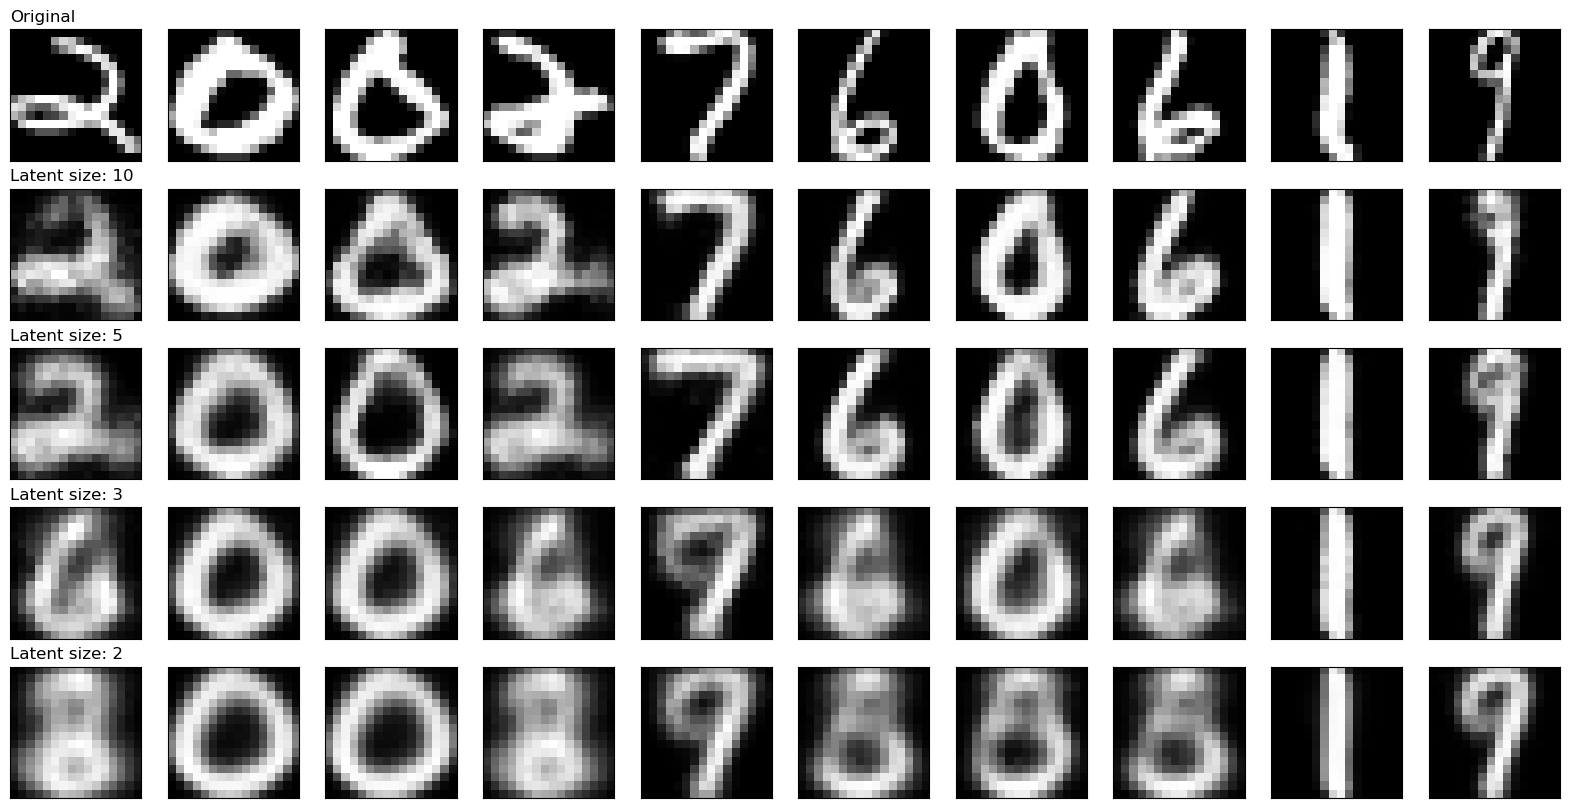

In [75]:


def reconstruct_images(encoder, decoder, input_images):
    latent_representations = encoder.forward(input_images)
    reconstructed_images = decoder.forward(latent_representations)
    return reconstructed_images


def display_images(original_images, reconstructed_images, num_images=10):
    plt.figure(figsize=(20, 10))
    latent_label = [10,5,3,2]
    for i in range(num_images):
        # Display original image
        ax = plt.subplot(5, num_images, i + 1)
        plt.imshow(original_images[i].reshape(16, 16), cmap="gray")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 0:
            ax.set_title("Original",loc='left')
        # Display reconstructed image
        for j in range(len(reconstructed_images)):
            ax = plt.subplot(5, num_images, num_images + i + 1 + j * num_images)
            plt.imshow(reconstructed_images[j][i].reshape(16, 16), cmap="gray")
            if i == 0:
                ax.set_title("Latent size: {}".format(latent_label[j]),loc='left')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    plt.savefig("autoencoder_reconstruct.png")


# Test the autoencoder on the test set
n_samples = 10
test_images = X_test[:n_samples]

reconstructed_images = []
reconstructed_images.append(reconstruct_images(encoder10, decoder10, test_images))
reconstructed_images.append(reconstruct_images(encoder5, decoder5, test_images))
reconstructed_images.append(reconstruct_images(encoder3, decoder3, test_images))
reconstructed_images.append(reconstruct_images(encoder2, decoder2, test_images))

# Visualize the original and decoded images
display_images(test_images, reconstructed_images)
